In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns 



/var/folders/9n/jvxczw3j3mbgs3rdk9lnk9km0000gn/T/ipykernel_14538/104025147.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

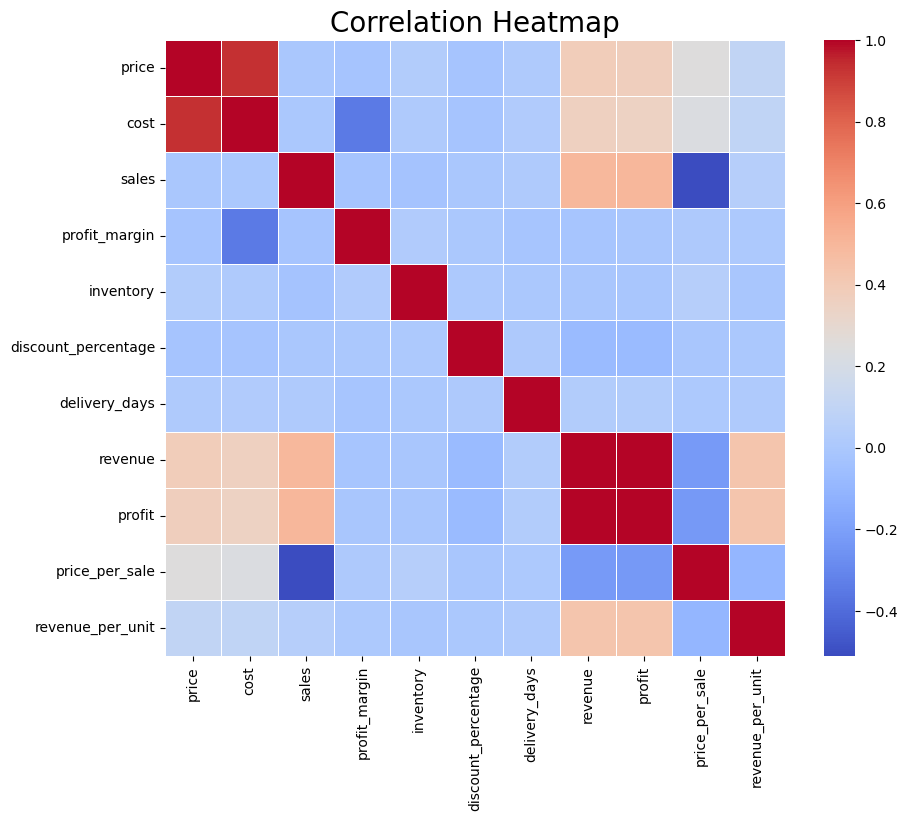

In [2]:
df = pd.read_csv('Furniture.csv')

# Create new features
df['profit'] = df['revenue'] - df['cost']
df['price_per_sale'] = df['price'] / df['sales']
df['revenue_per_unit'] = df['revenue'] / df['sales']

df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap',fontsize=20)



In [3]:
# Selecting features for prediction
features = df[['price', 'cost', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days', 'revenue', 'profit', 'price_per_sale', 'revenue_per_unit']]
target = df[['sales']]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # Flatten y_train for RandomForest


y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Display the predicted values and MAE
print("Predicted Sales (Random Forest):", y_pred_rf)
print("Mean Absolute Error (Random Forest):", mae_rf)

Predicted Sales (Random Forest): [24.48 18.35 35.98 10.96 25.11  6.33 24.79 22.21  3.44 12.32 24.92 21.48
  1.12 30.01 33.66 38.65  4.91 17.78 15.94  1.12  3.41 27.88 41.47 35.68
  1.96 43.97 16.43 43.33 12.34  5.82 47.25 40.94 15.29 20.66 20.2  47.05
  6.13 28.65 36.   33.05 46.14 43.37 28.4  27.76  5.34 30.29 29.14 23.04
 27.65 28.78  6.99 10.28 40.17 39.24 41.4  38.32 24.39  8.99  2.06  1.99
  7.36 24.5  38.9  15.35 15.96 45.15 44.15 29.72 35.53 10.05  6.87 45.21
  3.17 14.74 38.75 39.28 33.37 10.66 10.95 39.62 34.53  5.05 47.21  9.41
 41.53 33.65 33.45 13.82 23.06 39.57 42.15 17.04 16.74 22.14 19.82 44.18
 30.11 28.59 12.31  4.15 44.26  1.08  8.06 32.89 12.17  3.28 46.56 28.17
 23.14 34.59 16.95  2.07 30.67 23.37 37.52 39.44  9.95 18.05 24.47  7.96
 43.12 25.08 10.85 46.86 18.18 33.69 16.27 25.3  36.07 38.71 27.35 11.84
 13.07 25.17 21.68  4.98  9.51 20.3  17.87 28.39  4.73 26.06 18.48  6.01
 13.14 19.7   1.81 12.01 17.01 17.02 35.28  1.07 41.88 46.37  5.27 43.43
 38.37 14.19 23.27

In [4]:

# Create a DataFrame to compare actual sales and predicted sales
comparison = pd.DataFrame({
    'Actual Sales': y_test.values.flatten(),  # Flattening to ensure it matches the shape
    'Predicted Sales': y_pred_rf
})

# Display the comparison of actual vs predicted sales
print(comparison.head())  


   Actual Sales  Predicted Sales
0            24            24.48
1            18            18.35
2            35            35.98
3            10            10.96
4            25            25.11


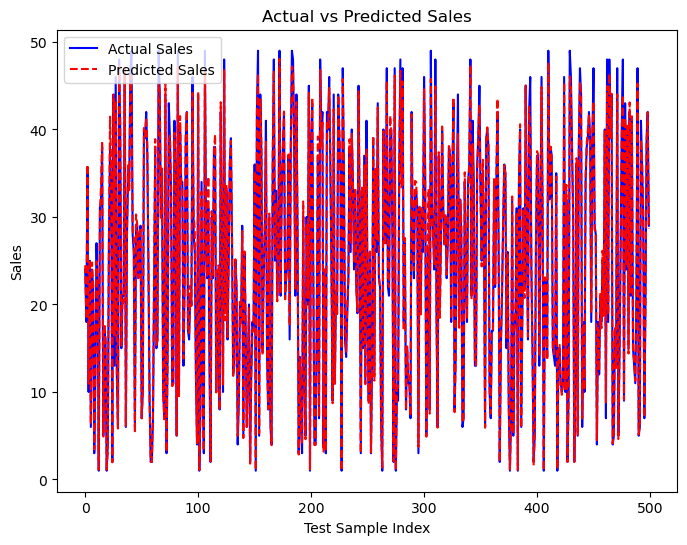

In [5]:

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label="Actual Sales", color="blue")
plt.plot(y_pred_rf, label="Predicted Sales", color="red", linestyle='dashed')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()